## Title: Personal Finance Savings Prediction Model
Name: Anirudh k kumar
Organization: Entri Elevate
Date: 20/12/2024

## OVERVIEW OF PROBLEM STATEMENT
Managing personal finances is critical for financial stability. Understanding factors influencing savings behavior can help individuals better allocate their income. This project aims to predict the Desired Savings Percentage using machine learning to provide actionable insights for improved financial planning.

## OBJECTIVE
To develop an ML model that predicts Desired Savings Percentage based on income, expenses, and demographics while identifying areas for potential savings.

## DATA DESCRIPTION
Source: From Kaggle https://www.kaggle.com/datasets/shriyashjagtap/indian-personal-finance-and-spending-habits/data
Features: 'Income', 'Age', 'Dependents', 'City_Tier', 'Rent', 'Loan_Repayment',
       'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
       'Utilities', 'Healthcare', 'Education', 'Miscellaneous',
       'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income',
       'Potential_Savings_Groceries', 'Potential_Savings_Transport',
       'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
       'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
       'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
       'Occupation_Retired', 'Occupation_Self_Employed', 'Occupation_udent']  ,
      dtype'object')

## IMPORTING LIBRARIES

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

## DATA COLLECTION

In [63]:
# Importing data
data= pd.read_csv('indianfinance.csv')

In [65]:
#Dataframe
df= pd.DataFrame(data)

In [67]:
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [71]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [73]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

In [75]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [77]:
df.shape

(20000, 27)

## DATA PREPROCESSING - DATA CLEANING

In [79]:
## Finding null and duplicates
df.duplicated().sum()

0

In [81]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

## There are no null and duplicate values.

In [85]:
df.dtypes

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

In [87]:
##Finding Outliers
numeric_values= df.select_dtypes(include=['number'])

In [89]:
numeric_values

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,1945.982149,1210.454952,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,3770.919375,2356.408295,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,896.290751,1571.911103,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,2545.419412,4721.792454,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


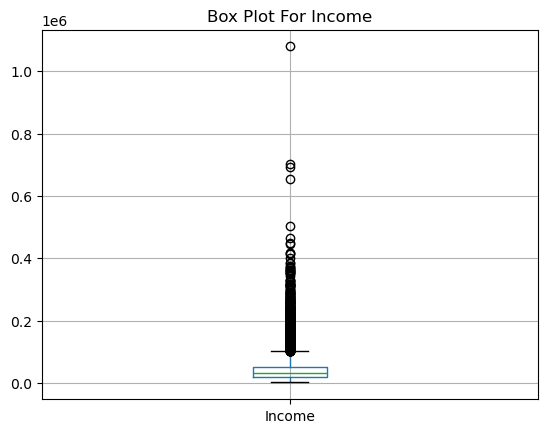

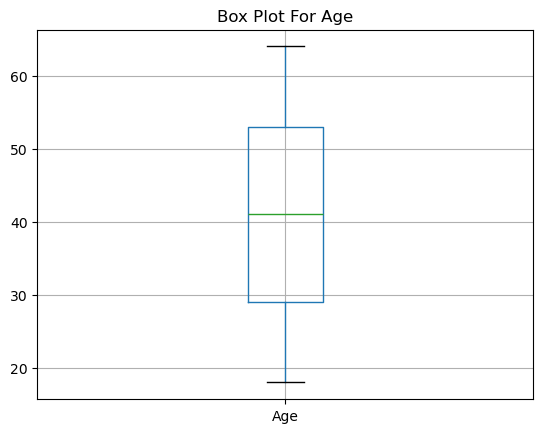

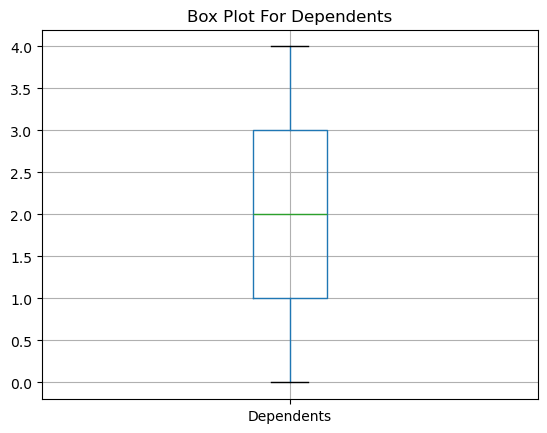

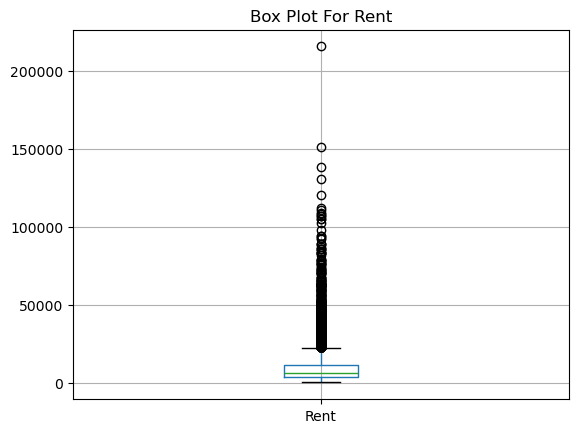

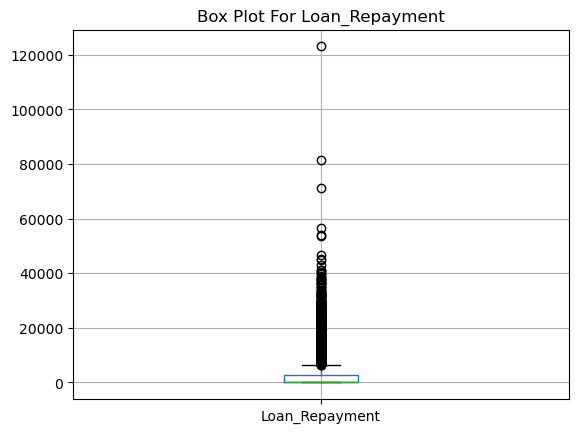

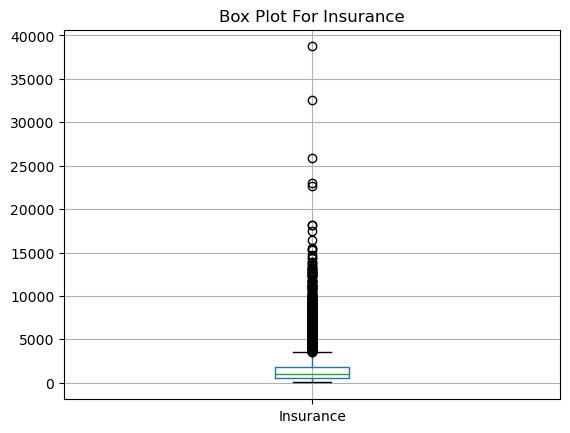

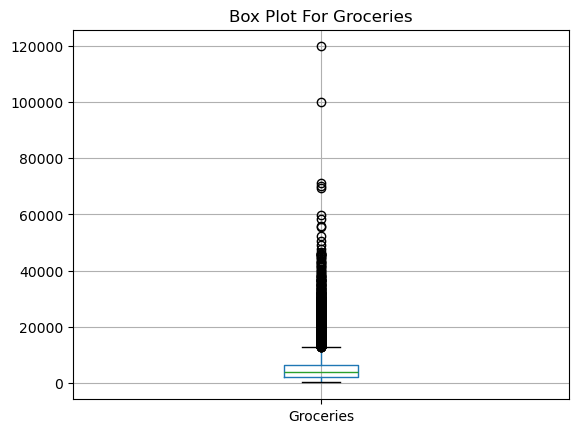

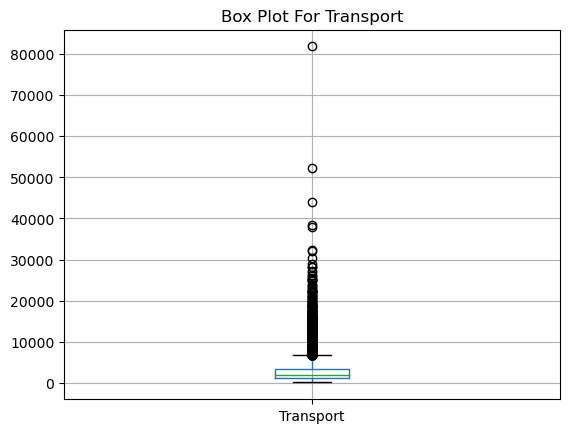

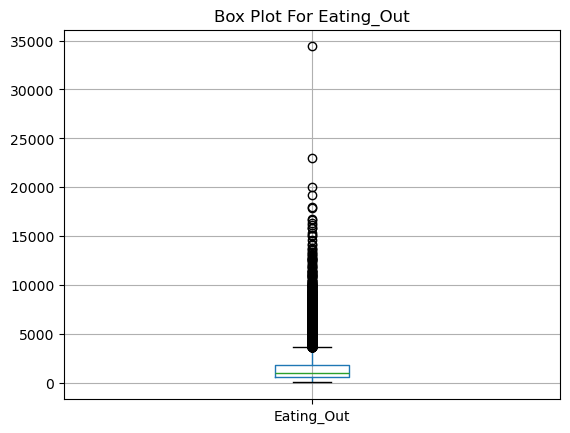

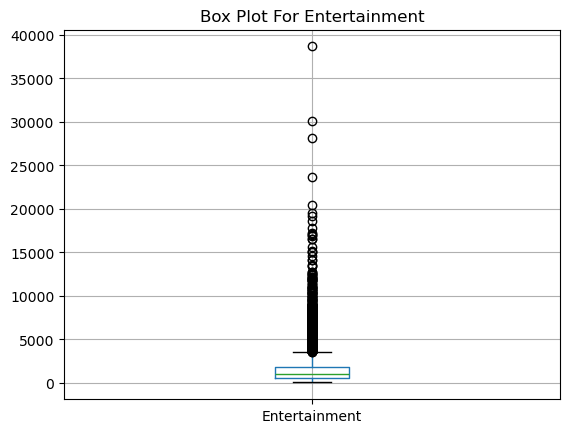

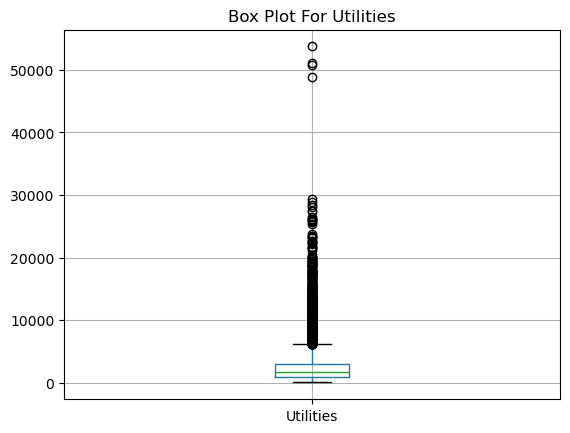

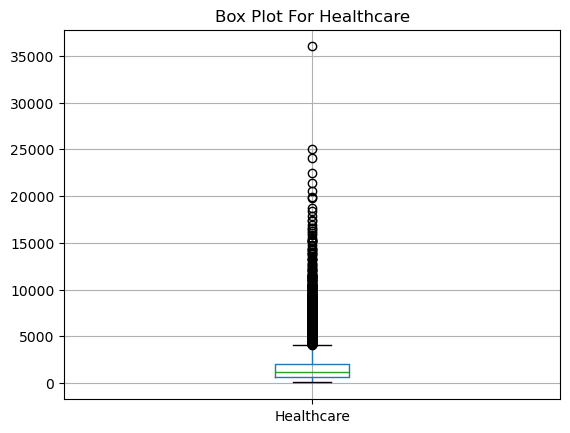

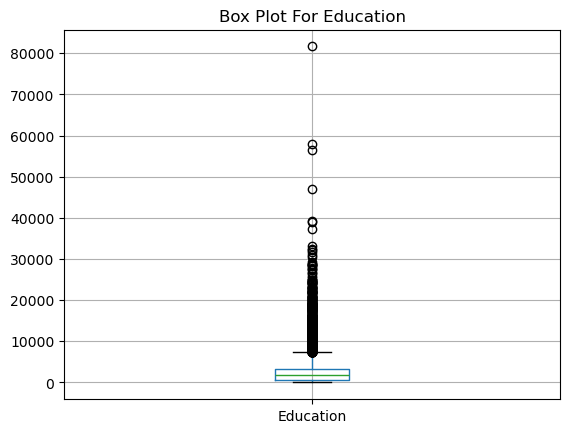

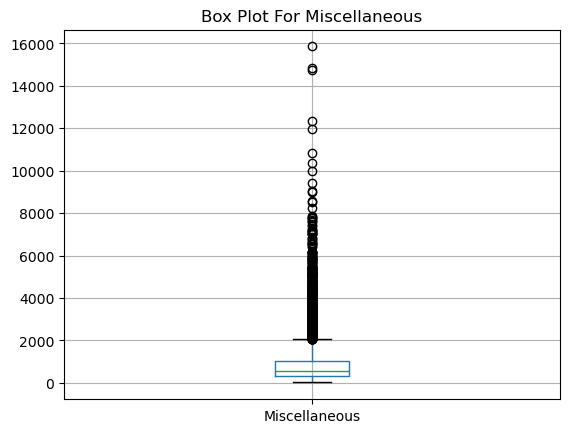

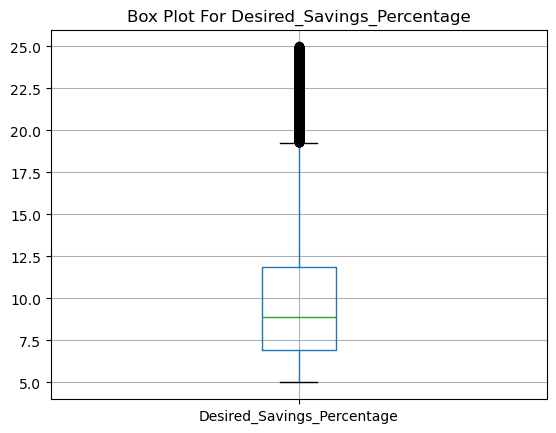

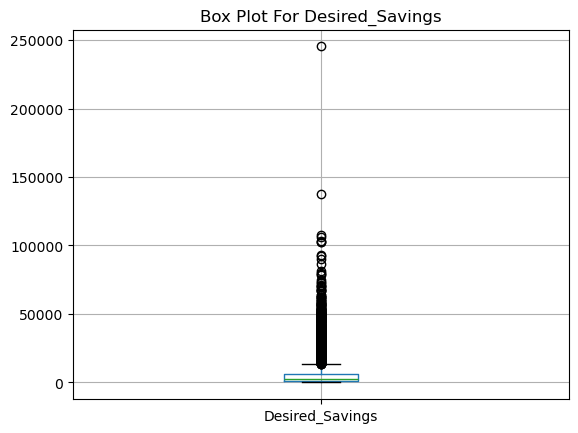

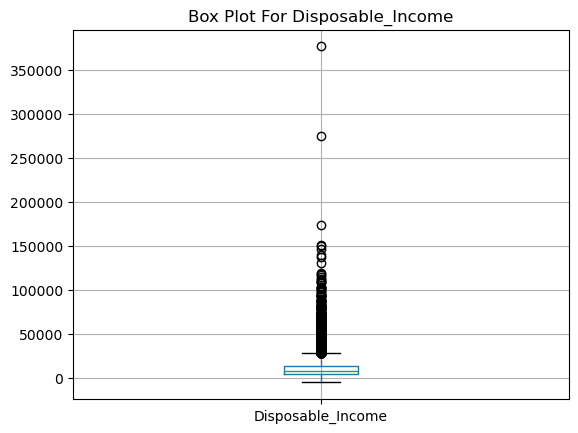

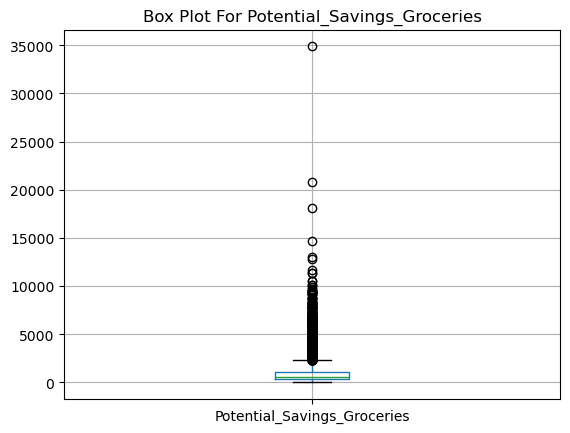

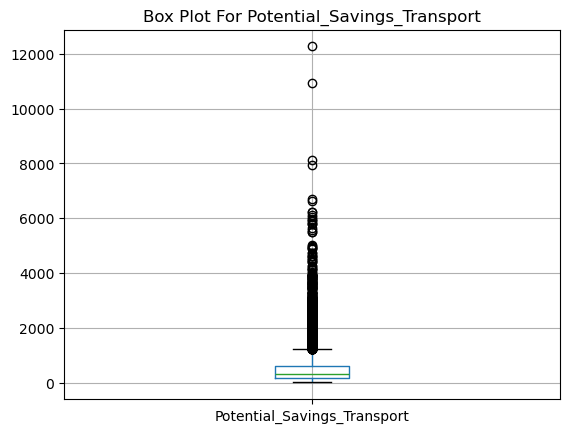

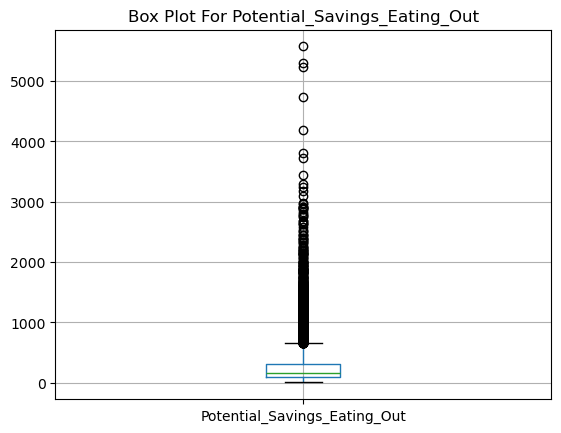

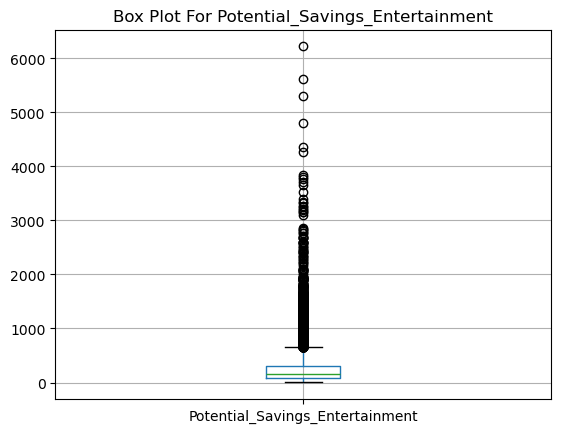

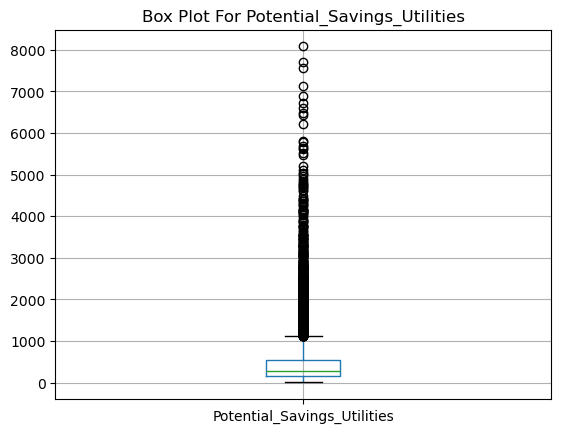

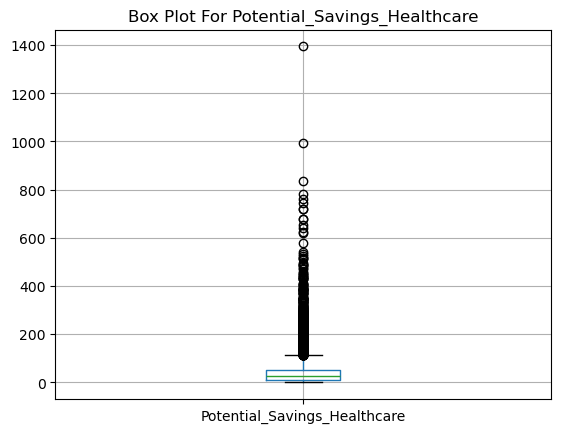

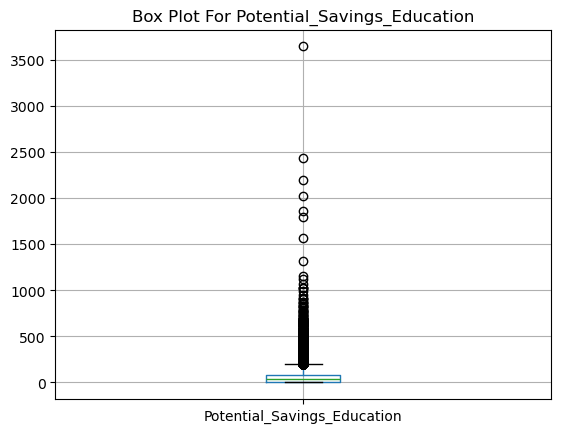

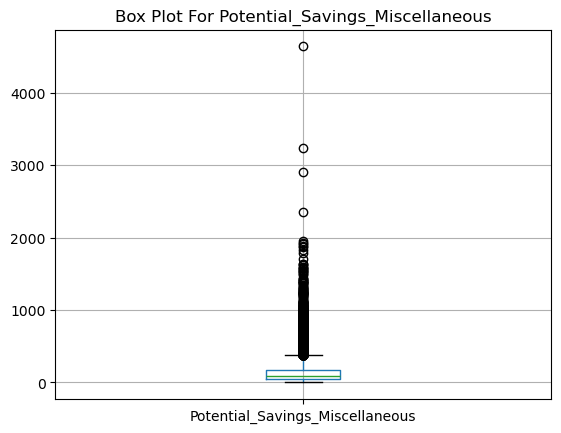

In [91]:
##for loop for numerical columns
for column in numeric_values.columns:
    plt.figure()
    numeric_values.boxplot(column= column)
    plt.title(f"Box Plot For {column}")
    plt.show()

In [92]:
## skewness
numeric_values.skew()

Income                             4.232803
Age                               -0.008878
Dependents                        -0.000117
Rent                               4.150531
Loan_Repayment                     5.099544
Insurance                          4.513667
Groceries                          3.960422
Transport                          4.736227
Eating_Out                         3.887579
Entertainment                      4.665013
Utilities                          4.347142
Healthcare                         3.883214
Education                          4.307865
Miscellaneous                      3.798297
Desired_Savings_Percentage         1.421412
Desired_Savings                    5.585197
Disposable_Income                  5.069602
Potential_Savings_Groceries        5.365886
Potential_Savings_Transport        4.364978
Potential_Savings_Eating_Out       4.228699
Potential_Savings_Entertainment    4.652173
Potential_Savings_Utilities        4.227651
Potential_Savings_Healthcare    

In [95]:
## Sorting outliers using IQR method
for column in numeric_values.columns:
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1

    lower= Q1 - (1.5*IQR)
    upper= Q3 + (1.5*IQR)
        
## Removing outliers(capping)
    df[column]= np.where(df[column] <lower, lower,
                         np.where(df[column] >upper, upper, df[column]))

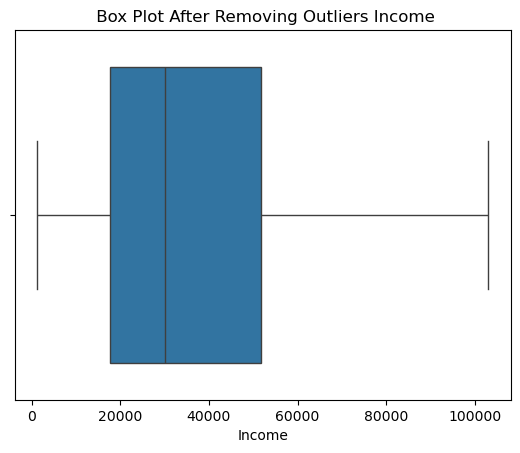

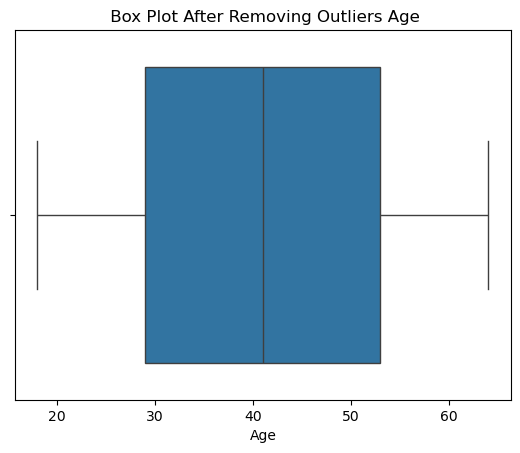

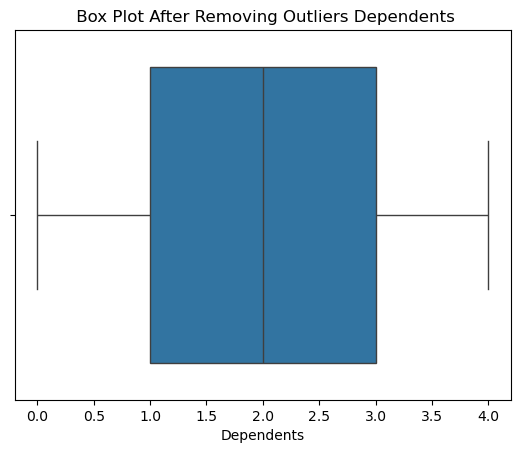

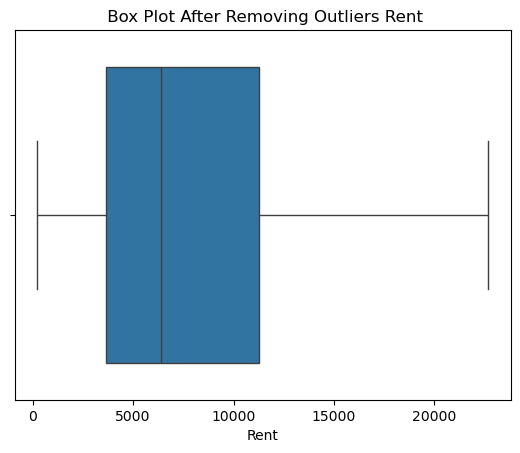

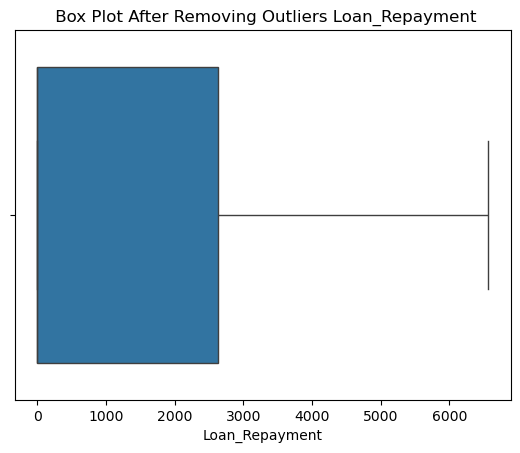

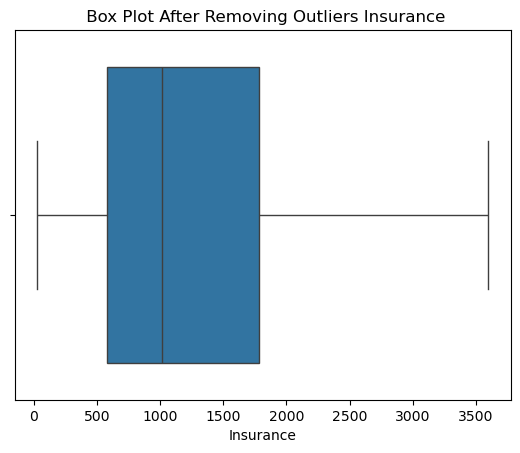

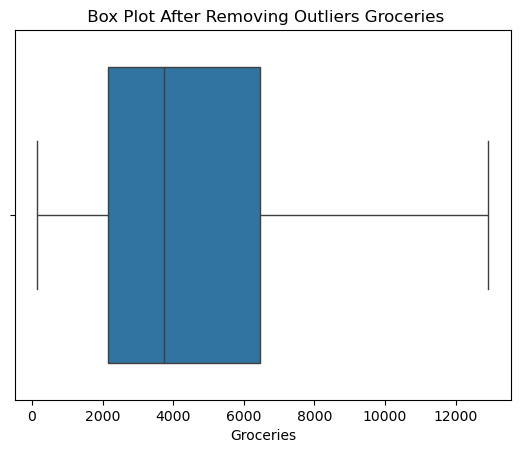

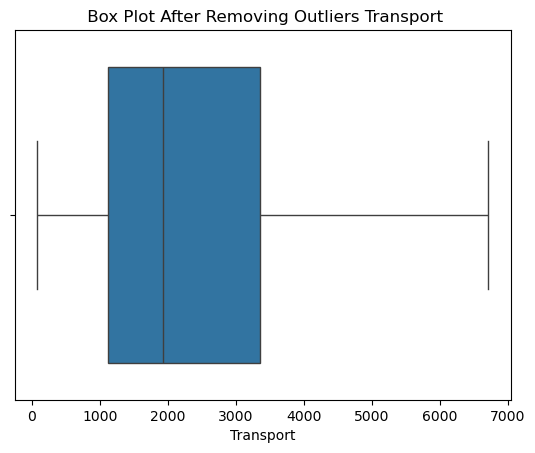

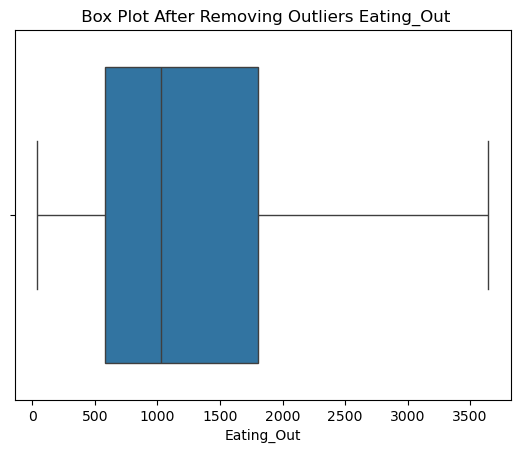

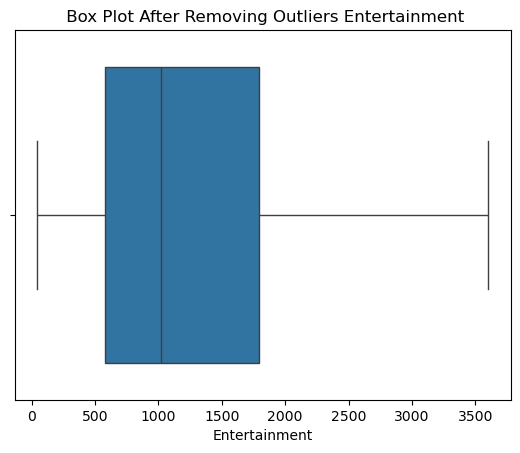

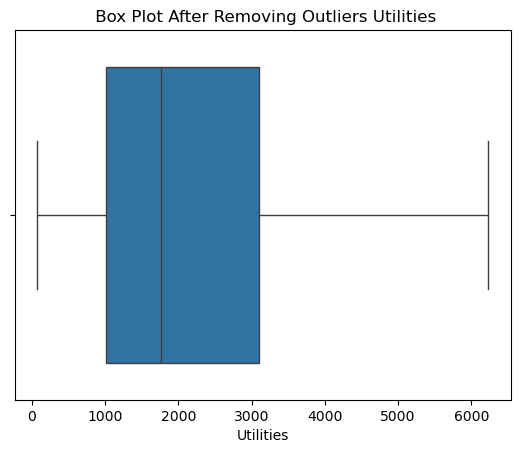

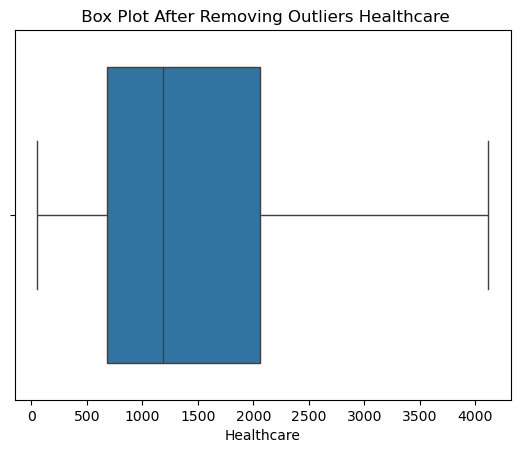

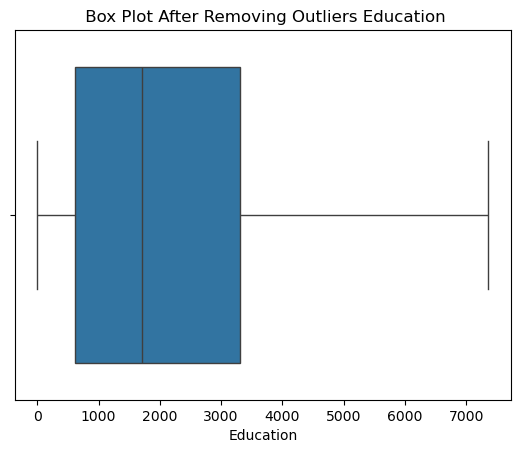

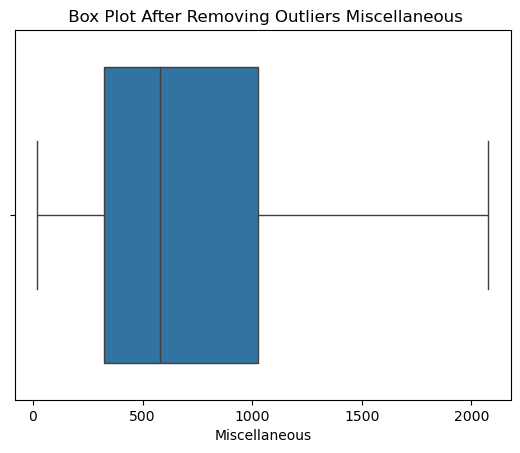

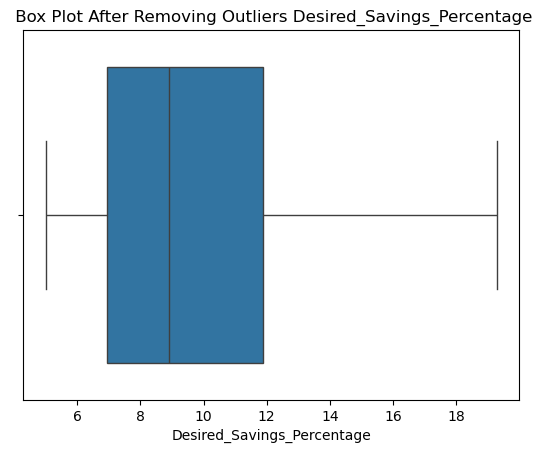

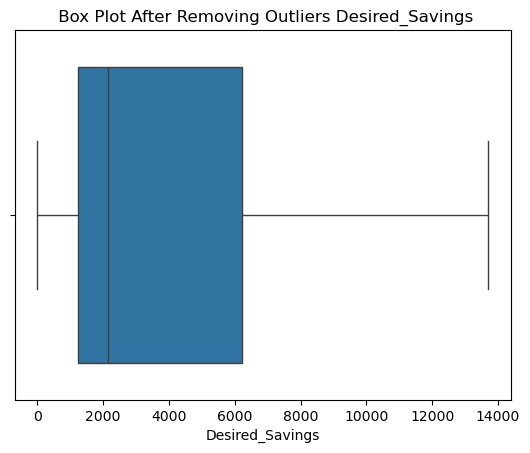

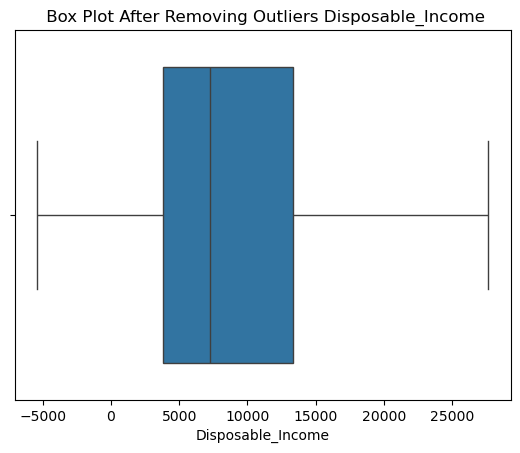

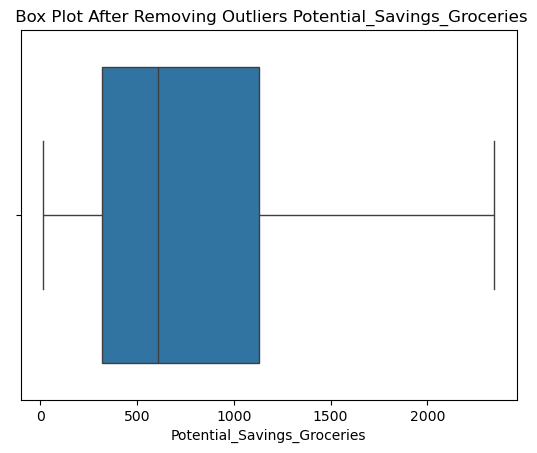

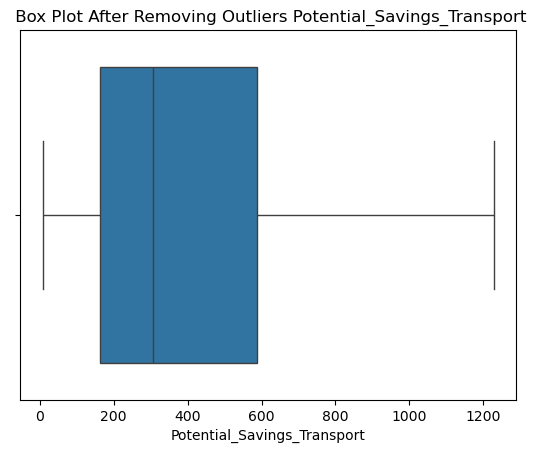

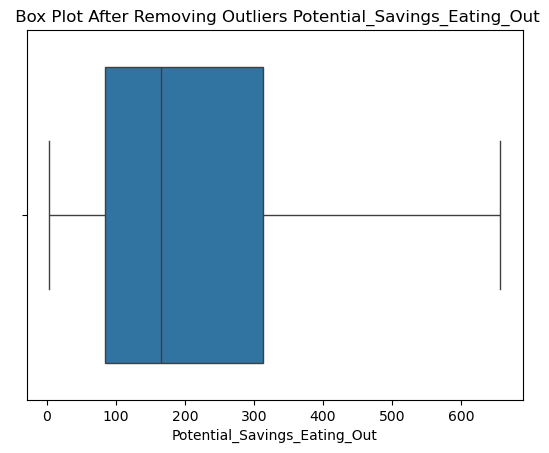

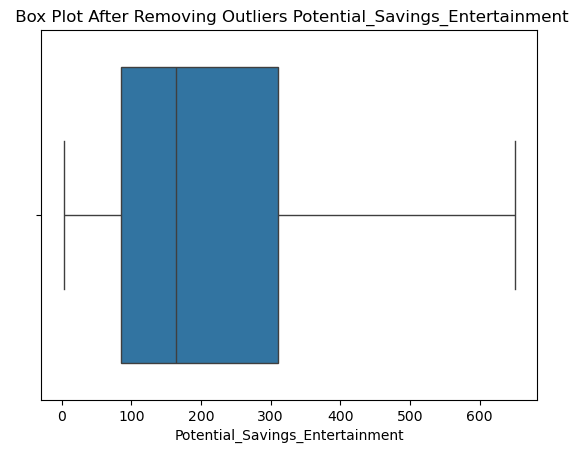

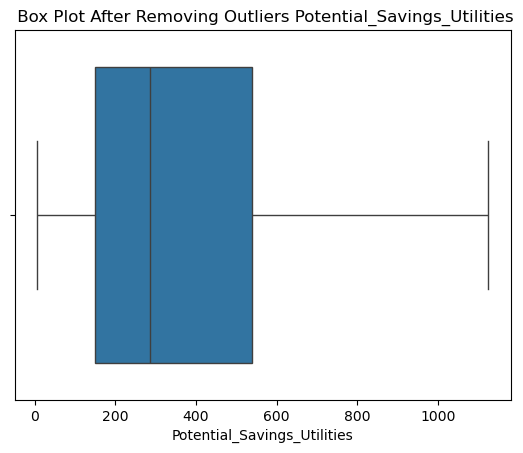

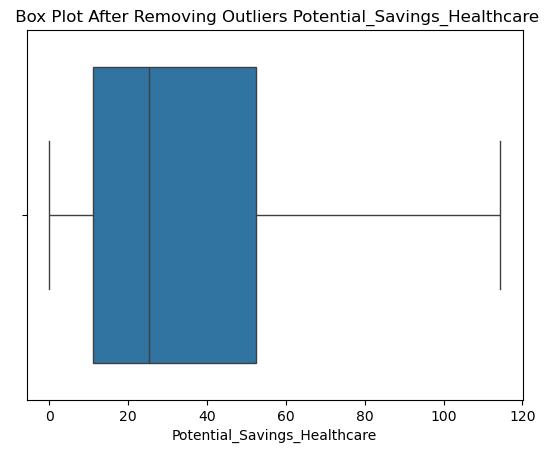

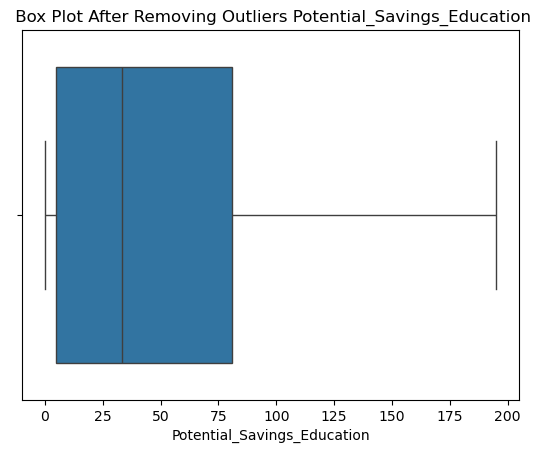

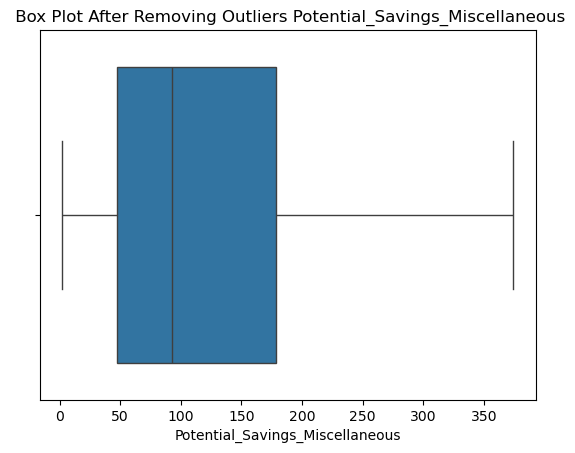

In [97]:
## Outliers after capping
for i in numeric_values.columns:
    plt.figure()
    sns.boxplot(data= df, x = i)
    plt.title(f" Box Plot After Removing Outliers {i}")
    plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
df.skew()

In [ ]:
df.columns

## EXPLORATORY DATA ANALYSIS

In [ ]:
sns.histplot(df['Desired_Savings_Percentage'], kde= True, color= 'blue')
plt.title("Distribution Of Desired Percentage")
plt.xlabel('Desired Saving Percentage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(26,12))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(df, vars=['Income', 'Groceries', 'Transport', 'Desired_Savings_Percentage'])
plt.show()

In [ ]:
sns.scatterplot(x=df['Income'], y=df['Desired_Savings_Percentage'], color='blue')
plt.title('Income vs Desired Savings Percentage')
plt.xlabel('Income')
plt.ylabel('Desired Savings Percentage')
plt.show()

In [ ]:
## Expense patterns
expense_cols = ['Groceries', 'Transport', 'Eating_Out', 'Entertainment']
total_expenses = data[expense_cols].sum()
total_expenses.plot(kind='bar', color='purple')
plt.title('Total Spending by Category')
plt.xlabel('Expense Categories')
plt.ylabel('Total Spending')
plt.show()

In [ ]:
#Total expenses
total_expenses.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Spending Categories')
plt.ylabel('')
plt.show()

In [ ]:
## Saving Capacity
sns.histplot(df['Desired_Savings'], kde=True, color='blue')
plt.title('Savings Capacity Distribution')
plt.xlabel('Savings Capacity (%)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sns.countplot(x='Occupation', data=data)
plt.title('Count of Each Occupation')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Heatmap for Spending Patterns: Show correlations between different spending categories
expense_corr = df[['Groceries', 'Transport', 'Eating_Out', 'Entertainment']].corr()
sns.heatmap(expense_corr, annot=True, cmap='viridis')
plt.title('Spending Patterns Heatmap')
plt.show()

## FEATURE ENGINEERINIG

In [ ]:
## Finding categoical columns
df_cat_columns= df.select_dtypes(include= ['object']).columns

In [ ]:
print(f"Categorical columns are {df_cat_columns}")

In [ ]:
## Using Label Encoder for 'City_tier' and One Hot Encoder for 'Occupation'
l_encoder= LabelEncoder()
df['City_Tier']= l_encoder.fit_transform(df['City_Tier'])

In [ ]:
df # 0 is Tier_1, 1 is Tier_2, 2 is Tier_3

In [ ]:
df['Occupation'].unique()

In [ ]:
df= pd.get_dummies(df, columns=['Occupation'], drop_first= True)

In [ ]:
df= df.astype(int)

In [ ]:
df

## FEATURE SELECTION

In [ ]:
# Define features and target
X = df.drop(['Desired_Savings_Percentage'], axis=1)
y = df['Desired_Savings_Percentage']

In [ ]:
X

In [ ]:
y

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5) 
model.fit(X_train, y_train)

In [ ]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

In [ ]:
threshold = 0.02  
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
X_selected = X[selected_features]

In [ ]:
X_selected.columns

In [ ]:
selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

In [ ]:
selected_features2 = X.columns[selector.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features2)
print("\nFeature Scores:")
print(feature_scores)